In [1]:
import tensorflow as tf
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten,Dense, Dropout, Rescaling
from tensorflow.keras import layers

2025-01-19 11:09:40.697338: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-19 11:09:48.803879: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-19 11:09:53.372832: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-19 11:09:54.575701: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-19 11:10:04.255362: I tensorflow/core/platform/cpu_feature_guar

In [17]:
img_height = 256
img_width = 256

In [4]:
DIR = "/mnt/d/coding/python-projects/tf/weather-ml/dataset/data"
DIR

'dataset/data'

In [12]:
train_data = tf.keras.utils.image_dataset_from_directory(DIR,
                                                  validation_split=0.2,
                                                  subset='training',
                                                    seed=123)

Found 1123 files belonging to 4 classes.
Using 899 files for training.


In [13]:
val_data = tf.keras.utils.image_dataset_from_directory(DIR,
                                                       validation_split=0.2,
                                                       subset='validation',
                                                      seed=123)

Found 1123 files belonging to 4 classes.
Using 224 files for validation.


In [14]:
class_names = train_data.class_names
print(class_names)

['cloudy', 'rain', 'shine', 'sunrise']


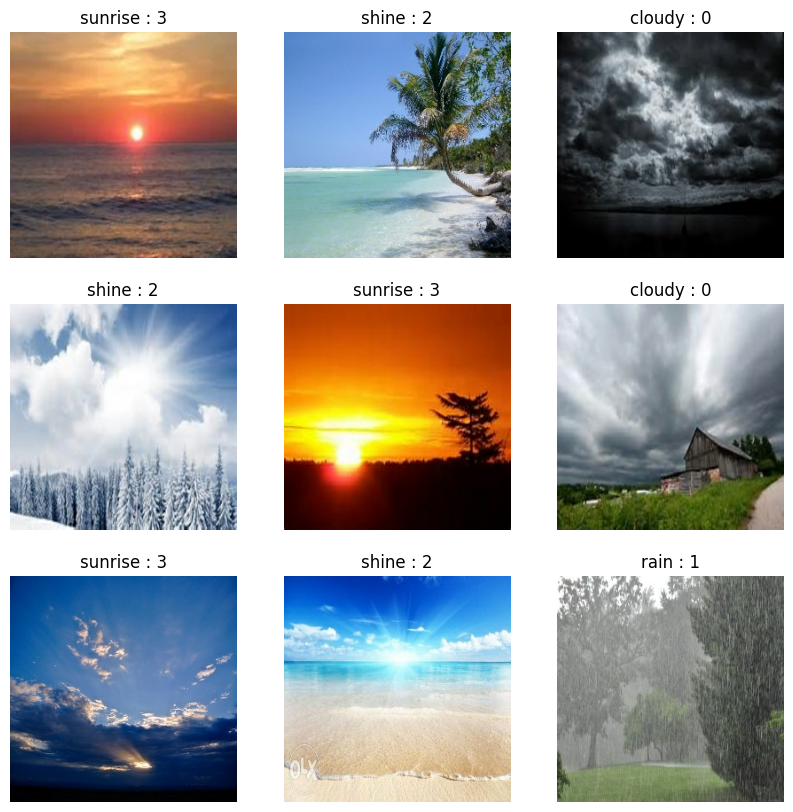

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(f"{class_names[labels[i]]} : {labels[i]}")
    plt.axis("off")

In [30]:
for img, label in train_data:
    print(img.shape)
    print(label.shape)
    break

(32, 256, 256, 3)
(32,)


In [18]:
AUTOTUNE = tf.data.AUTOTUNE

train_data = train_data.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_data = val_data.cache().prefetch(buffer_size=AUTOTUNE)

In [20]:
num_classes = len(class_names)
num_classes

4

In [25]:
model = Sequential([
    Rescaling(1./255, input_shape=(img_height,img_width,3)),

    Conv2D(16,2, padding='same', activation='relu'),
    MaxPooling2D(),

    Conv2D(32, 2, padding='same', activation='relu'),
    MaxPooling2D(),

    Conv2D(64, 2, padding='same', activation='relu'),
    MaxPooling2D(),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes)
])

In [27]:
model.compile(
    optimizer = 'adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 16)      208       
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      2080      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        8

In [31]:
epochs = 10

In [32]:
history = model.fit(
    train_data,
    validation_data = val_data,
    epochs=epochs
)

Epoch 1/10


2023-12-08 16:53:16.933019: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2023-12-08 16:53:28.523257: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-12-08 16:53:31.092604: I external/local_xla/xla/service/service.cc:168] XLA service 0x55af3b9be930 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-12-08 16:53:31.092634: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2023-12-08 16:53:31.253990: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1702034612.121005    1428 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


29/29 [==============================] - 49s 128ms/step - loss: 0.9068 - accuracy: 0.6630 - val_loss: 0.4960 - val_accuracy: 0.8304
Epoch 2/10


2023-12-08 16:53:51.323853: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


29/29 [==============================] - 2s 59ms/step - loss: 0.3850 - accuracy: 0.8665 - val_loss: 0.4565 - val_accuracy: 0.8571
Epoch 3/10
29/29 [==============================] - 2s 59ms/step - loss: 0.2903 - accuracy: 0.8888 - val_loss: 0.3932 - val_accuracy: 0.8438
Epoch 4/10
29/29 [==============================] - 2s 59ms/step - loss: 0.1804 - accuracy: 0.9355 - val_loss: 0.3942 - val_accuracy: 0.8705
Epoch 5/10
29/29 [==============================] - 2s 59ms/step - loss: 0.1104 - accuracy: 0.9600 - val_loss: 0.3881 - val_accuracy: 0.8884
Epoch 6/10
29/29 [==============================] - 2s 59ms/step - loss: 0.1150 - accuracy: 0.9622 - val_loss: 0.3723 - val_accuracy: 0.9062
Epoch 7/10
29/29 [==============================] - 2s 59ms/step - loss: 0.1014 - accuracy: 0.9689 - val_loss: 0.3835 - val_accuracy: 0.9107
Epoch 8/10
29/29 [==============================] - 2s 59ms/step - loss: 0.0361 - accuracy: 0.9900 - val_loss: 0.4329 - val_accuracy: 0.8795
Epoch 9/10
29/29 [======

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

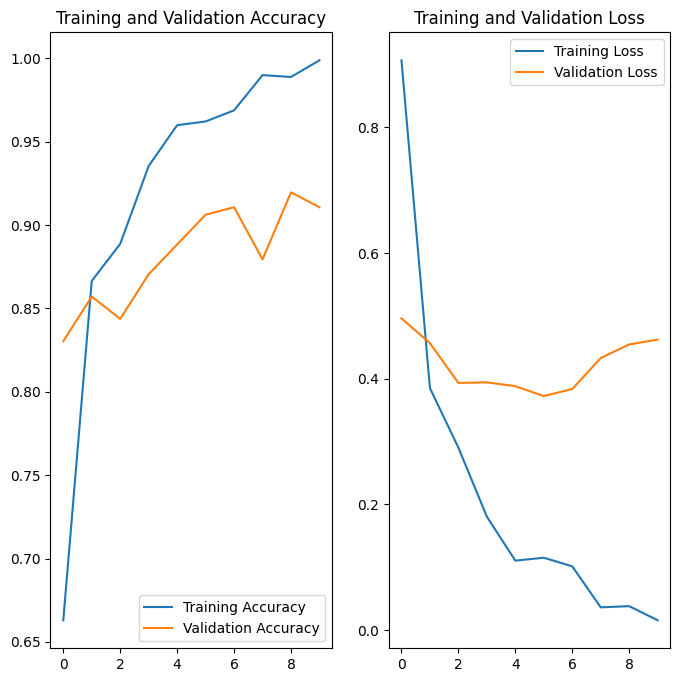

In [34]:
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [1]:
data_augment = tf.keras.models.Sequential([
    tf.keras.layers.RandomFlip(input_shape = (256,256,3)),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomContrast(0.2),
    tf.keras.layers.RandomBrightness(0.3)
]) 

NameError: name 'tf' is not defined

In [38]:
model1 = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

In [42]:
model1.compile(
    optimizer = 'adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [43]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 128, 128, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                 

In [47]:
epochs = 15
history = model1.fit(
  train_data,
  validation_data=val_data,
  epochs=epochs
)

Epoch 1/15


2023-12-08 17:01:01.777230: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_2/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2023-12-08 17:01:08.344130: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 886.04MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-12-08 17:01:09.138021: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 886.04MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-12-08 17:01:09.835459: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc)

29/29 [==============================] - 17s 163ms/step - loss: 0.9621 - accuracy: 0.6685 - val_loss: 0.7131 - val_accuracy: 0.6741
Epoch 2/15
29/29 [==============================] - 3s 91ms/step - loss: 0.5145 - accuracy: 0.8287 - val_loss: 0.5724 - val_accuracy: 0.8214
Epoch 3/15
29/29 [==============================] - 3s 91ms/step - loss: 0.5114 - accuracy: 0.8042 - val_loss: 0.4636 - val_accuracy: 0.8214
Epoch 4/15
29/29 [==============================] - 3s 91ms/step - loss: 0.3862 - accuracy: 0.8587 - val_loss: 0.4482 - val_accuracy: 0.8438
Epoch 5/15
29/29 [==============================] - 3s 91ms/step - loss: 0.3968 - accuracy: 0.8521 - val_loss: 0.4114 - val_accuracy: 0.8348
Epoch 6/15
29/29 [==============================] - 3s 92ms/step - loss: 0.2965 - accuracy: 0.8910 - val_loss: 0.3556 - val_accuracy: 0.8839
Epoch 7/15
29/29 [==============================] - 3s 91ms/step - loss: 0.2359 - accuracy: 0.9121 - val_loss: 0.4187 - val_accuracy: 0.8839
Epoch 8/15
29/29 [====

In [48]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

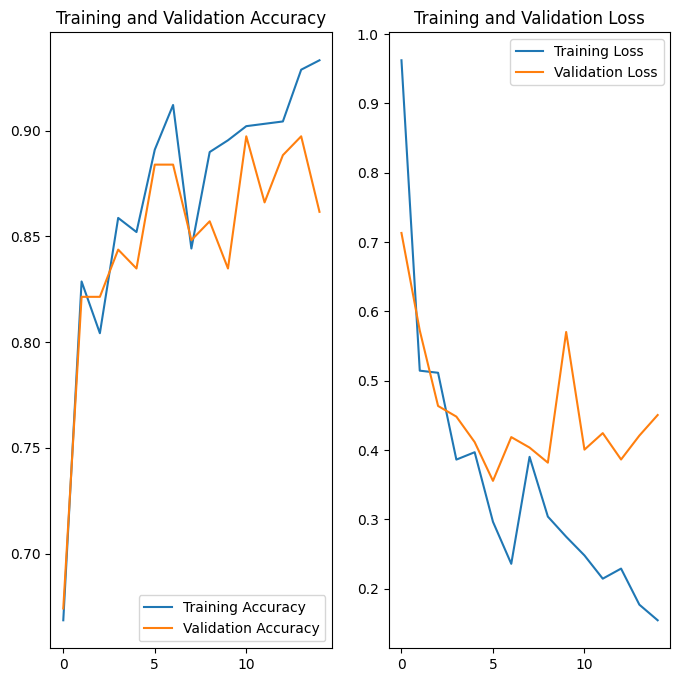

In [49]:
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [54]:
import numpy as np

In [114]:
test_img = tf.keras.utils.load_img(
    "test_img/rain.jpg", target_size=(img_height, img_width)
)

In [115]:
img_arr = tf.keras.utils.img_to_array(test_img)
img_arr = tf.expand_dims(img_arr, 0)
img_arr.shape

TensorShape([1, 256, 256, 3])

In [81]:
predictions = model.predict(img_arr)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 17ms/step
This image most likely belongs to rain with a 79.62 percent confidence.


In [83]:
model1.save("models/weather_img.keras")

In [84]:
immodel = tf.keras.models.load_model("models/weather_img.keras")

In [90]:
def pred(img_file:str):
    img_height, img_width = 256,256
    img = tf.keras.utils.load_img(img_file, target_size=(img_height,img_width))
    img_arr = tf.keras.utils.img_to_array(img)
    img_arr = tf.expand_dims(img_arr, 0)
    pred = immodel.predict(img_arr)
    score = tf.nn.softmax(pred)
    return {"prediction": class_names[np.argmax(score)], "score": 100*np.max(score)}

In [91]:
pred("test_img/rain.jpg")

1/1 [==============================] - 0s 19ms/step


{'prediction': 'rain', 'score': 99.88017082214355}

In [96]:
class Weather:
    def __init__(self):
        try:
            self.model = tf.keras.models.load_model("models/weather_img.keras")
            print("model loaded successfully")
        except:
            print("could not load the model")
        
        self.img_height:int = 256
        self.img_width:int = 256
        self.class_names:list = ['cloudy', 'rain', 'shine', 'sunrise']

    def predict(self, filename:str):
        img = tf.keras.utils.load_img(filename, target_size=(self.img_height,self.img_width))
        img_arr = tf.keras.utils.img_to_array(img)
        img_arr = tf.expand_dims(img_arr, 0)
        prediction = self.model.predict(img_arr)
        score = tf.nn.softmax(prediction)
        return {"prediction": self.class_names[np.argmax(score)], "score": 100*np.max(score)}

In [97]:
model = Weather()

model loaded successfully


In [98]:
model.predict("test_img/rain.jpg")

1/1 [==============================] - 0s 52ms/step


{'prediction': 'rain', 'score': 99.88017082214355}

# Convert model to tflite version

In [105]:
converter = tf.lite.TFLiteConverter.from_keras_model(model1)
tflite_model = converter.convert()

with open('models/weather_model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpr122tu5a/assets


INFO:tensorflow:Assets written to: /tmp/tmpr122tu5a/assets
2023-12-08 17:39:09.733575: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:378] Ignored output_format.
2023-12-08 17:39:09.733617: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:381] Ignored drop_control_dependency.
2023-12-08 17:39:09.733760: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /tmp/tmpr122tu5a
2023-12-08 17:39:09.737735: I tensorflow/cc/saved_model/reader.cc:51] Reading meta graph with tags { serve }
2023-12-08 17:39:09.737748: I tensorflow/cc/saved_model/reader.cc:146] Reading SavedModel debug info (if present) from: /tmp/tmpr122tu5a
2023-12-08 17:39:09.748448: I tensorflow/cc/saved_model/loader.cc:233] Restoring SavedModel bundle.
2023-12-08 17:39:09.813454: I tensorflow/cc/saved_model/loader.cc:217] Running initialization op on SavedModel bundle at path: /tmp/tmpr122tu5a
2023-12-08 17:39:09.825374: I tensorflow/cc/saved_model/loader.cc:316] SavedModel

In [106]:
TF_MODEL_FILE_PATH = 'models/weather_model.tflite' # The default path to the saved TensorFlow Lite model

interpreter = tf.lite.Interpreter(model_path=TF_MODEL_FILE_PATH)

In [107]:
classify_lite = interpreter.get_signature_runner('serving_default')
classify_lite

In [116]:
predictions_lite = classify_lite(sequential_1_input=img_arr)['outputs']
score_lite = tf.nn.softmax(predictions_lite)

In [117]:
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score_lite)], 100 * np.max(score_lite))
)

This image most likely belongs to rain with a 99.88 percent confidence.
